# Part 2: Vector data Processing in Python

In this session we will look at how geodata can be represented in Python using different data structures. We will use a GeoJSON file for this purpose, since it can be easily ready humans and machines. 


Vector data processing using fiona, shapely and geopandas relies on the [GeoJSON format](https://de.wikipedia.org/wiki/GeoJSON). Hence, features (no matter whether they origiinate from a shapefile) are respresented as dictionaries following the GeoJSON specifications. Therefore, I would recommend using geojson files instead of shapefiles when working with Python. 

## 1. Creating GeoJSON data

### Exercise 1:
1. Go to [geojson.io](http://geojson.io).
2. Create a Point, a LineString and a Polygon anywhere on the map. 
3. Move the Point somewhere else by editing the GeoJSON data in the editor. 
4. Download the file. 
5. Bonus: try to generate a polygon with a hole.

## 2. Reading GeoJSON in Python

__Exercise:__ Load your geojson file  into Python as a string using the `open` function.

In [3]:
geojson_path = "./data/some_features.geojson"

In [4]:
src = open(geojson_path, "r")
polygons_str = open(geojson_path, "r").read()
src.close()
polygons_str

'{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"color":"green","id":1},"geometry":{"type":"Polygon","coordinates":[[[8.670530319213867,49.41337442939828],[8.685293197631836,49.41337442939828],[8.685293197631836,49.421861555723595],[8.670530319213867,49.421861555723595],[8.670530319213867,49.41337442939828]]]}},{"type":"Feature","properties":{"color":"blue","id":2},"geometry":{"type":"Polygon","coordinates":[[[8.680486679077148,49.418455714236885],[8.69619369506836,49.418455714236885],[8.69619369506836,49.42833758576036],[8.680486679077148,49.42833758576036],[8.680486679077148,49.418455714236885]],[[8.688468933105469, 49.42398310798032],\n   [8.693962097167969, 49.42398310798032],\n   [8.693962097167969, 49.426607006252176],\n   [8.688468933105469, 49.426607006252176],\n   [8.688468933105469, 49.42398310798032]]]}}]}\n'

__Questions__
1. Name the basic data structures in Python.
2. Which one of those is most suitable to store geojson data?
3. Decode the string to a more suitable data structure.

### Decoding json
We can also do this in one go using a context manager ("with") which will close the data set after all operations have been performed. The resulting object is now of type dictionary.

In [7]:
import json

In [8]:
with open(geojson_path, "r") as src:
    data_geojson = json.loads(src.read())

In [9]:
data_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'color': 'green', 'id': 1},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[8.670530319213867, 49.41337442939828],
      [8.685293197631836, 49.41337442939828],
      [8.685293197631836, 49.421861555723595],
      [8.670530319213867, 49.421861555723595],
      [8.670530319213867, 49.41337442939828]]]}},
  {'type': 'Feature',
   'properties': {'color': 'blue', 'id': 2},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[8.680486679077148, 49.418455714236885],
      [8.69619369506836, 49.418455714236885],
      [8.69619369506836, 49.42833758576036],
      [8.680486679077148, 49.42833758576036],
      [8.680486679077148, 49.418455714236885]],
     [[8.688468933105469, 49.42398310798032],
      [8.693962097167969, 49.42398310798032],
      [8.693962097167969, 49.426607006252176],
      [8.688468933105469, 49.426607006252176],
      [8.688468933105469, 49.42398310798032]]]}}]}

### Fiona: Reading and writing geographic data in Python

"[Fiona] focuses on reading and writing data in standard Python IO style and relies upon familiar Python types and protocols such as files, dictionaries, mappings, and iterators instead of classes specific to GDAL's OpenGIS Reference Implementation (OGR)." [Fiona Documentation](https://github.com/Toblerity/Fiona)

Reading the data like that still seems a bit cumbersome and it wouldn't work for shapefiles. Luckily there is Fiona - a Python library that provides an interface to GDAL/OGR to read and write data. 

In [14]:
import fiona
source = fiona.open(geojson_path)
features = list(source)
type(source)

fiona.collection.Collection

You can read different metadata information from the fiona. 

In [15]:
source.crs
source.meta

{'driver': 'GeoJSON',
 'schema': {'properties': OrderedDict([('color', 'str'), ('id', 'int')]),
  'geometry': 'Polygon'},
 'crs': {'init': 'epsg:4326'},
 'crs_wkt': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'}

As with every file connection, it is important to explicitly close them after your done with it. This is usually done using the `close()` method. However, very often forgotten. To avoid conflicts, it is better to use context managers. You create them using the `with` statement. Everything inside the block is executed while the file is open. Afterwards the file is closed automatically. 

In [77]:
source.close()

In [16]:
with fiona.open(geojson_path) as src:
    #for item in src:
    #    print(item)
    features = list(src)
    crs = src.crs

### Exercise 2:
__1. Load the data from the file "./cs4geos_ss19/exercice/ex1/polygons.geojson" into Python.__

In [18]:
geojson_path_2 = "./data/some_features.geojson"

In [22]:
with fiona.open(geojson_path_2) as src:
    features = list(src)
    crs = src.crs

__Questions:__
1. What how many features are contained in the geojson file? 
2. What is the difference between the geometries of the features?

__2. Save the features to separate new variables 'feature1' and 'feature2'.__

In [26]:
feature1 = features[0]
feature2 = features[1]

__3. Print the coordinates of feature2.__

In [27]:
feature2["geometry"]["coordinates"]

[[(8.680486679077148, 49.418455714236885),
  (8.69619369506836, 49.418455714236885),
  (8.69619369506836, 49.42833758576036),
  (8.680486679077148, 49.42833758576036),
  (8.680486679077148, 49.418455714236885)],
 [(8.688468933105469, 49.42398310798032),
  (8.693962097167969, 49.42398310798032),
  (8.693962097167969, 49.426607006252176),
  (8.688468933105469, 49.426607006252176),
  (8.688468933105469, 49.42398310798032)]]

__4. Fill the hole of the geometry of feature2 by manipulating the geojson dictionary. Afterwards, execute the cell above again to see how the coordinates changed.__

In [28]:
del feature2["geometry"]["coordinates"][1]

## 3. Geometric Operations in Python using Shapely
This works, but if we want to perform more complex geometric operations such as intersections between two geometries we need more complex data structures than a dictionary.
Shapely is the perfect tool for this. Shapely is a Python module which converts dictionaries / geojson objects to geometry objects and allows us to perform geospatial operations. Check out the [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html)

In [29]:
from shapely.geometry import shape

__0. Load the data from the file "./cs4geos_ss19/exercice/ex1/polygons.geojson" into Python again.__ Note: You don't have the copy the code here again, just execute the relevant cells above again.

__1. Extract the geometries of the two features and save them to new variables called 'geometry1' and 'geometry2'. What is the data type?__

In [31]:
geometry1 = feature1["geometry"]
geometry2 = feature2["geometry"]
geometry2

{'type': 'Polygon',
 'coordinates': [[(8.680486679077148, 49.418455714236885),
   (8.69619369506836, 49.418455714236885),
   (8.69619369506836, 49.42833758576036),
   (8.680486679077148, 49.42833758576036),
   (8.680486679077148, 49.418455714236885)]]}

__2. Use the method `shapely.shape` to convert the dictionary representation of the geometry to a shapely object. What is the data type of the new object?__

In [32]:
geom_obj1 = shape(geometry1)
geom_obj2 = shape(geometry2)
type(geom_obj1)

shapely.geometry.polygon.Polygon

__3. Plot the geometry of feature1.__

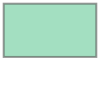

In [33]:
geom_obj1

__4. Calculate the area of the polygon.__

In [34]:
geom_obj1.area

0.00012529441405854442

__5. Intersect the geometries of the two features.__

In [35]:
geom_obj2.intersection(geom_obj1).area

1.637024030019807e-05

__6. Creating new geometries with Shapely__

We can also use Shapely to create new geometry objects and the convert them to geojson dictionary.

In [36]:
from shapely.geometry import Point, mapping
point = Point([13, 49])
point
point_json = mapping(point)
point_json

{'type': 'Point', 'coordinates': (13.0, 49.0)}

### Exercise 3:

__1. Create a rectangle geometry using shapely.__ 

In [37]:
from shapely.geometry import Polygon

In [39]:
coordinates = [(0., 0.), (0., 1.), (1., 1.), (1., 0.), (0., 0.)]

In [42]:
rectangel = Polygon(coordinates)

__2. Create a point which is located inside the rectangle.__

In [43]:
point = Point(0.5, 0.5)

__3. Use the `within()` function to check whether the point is within the rectangle.__

In [44]:
point.within(rectangel)

True

## Geospatial analyses with attribute data using Geopandas
With shapely we can perform geospatial operations, but for some spatial analyses we also need to include attribute information of the features. Therefore, we need another layer of abstraction --> Geopandas!

In [45]:
import geopandas as gpd

In [46]:
data_df = gpd.read_file(geojson_path_2)

In [47]:
data_df.head()

,color,id,geometry
0,green,1,"POLYGON ((8.670530319213867 49.41337442939828,..."
1,blue,2,"POLYGON ((8.680486679077148 49.41845571423688,..."


We can also plot the data with geopandas, but we need to enable matplotlib within jupyter using the magic command `%matplotlib inline`.

In [48]:
%matplotlib inline

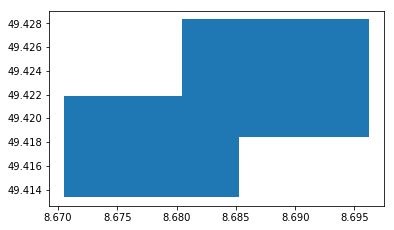

In [49]:
data_df.plot()

It looks more fancy with a background map. So lets add openstreetmap as a basemap with mplleaflet.

In [50]:
data_df.to_crs({"init": "epsg:32633"}).area

0    1.015512e+06
1    1.141046e+06
dtype: float64

In [51]:
import mplleaflet

In [52]:
data_df.plot()
mplleaflet.display()

/Users/chludwig/Development/meinGruen/code/green_tag_info/env/green_tag_info/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Great you went all the way from creating your geodata by hand up to displaying it in Python. 

If you want to learn more about GeoPandas, check out the tutorial in the course repository located in  './exercises/ex1/geopandas-tutorial'. 

__Final exercise:__ Remember Exercise D from the GeoScripting course. Solve the temperature exercise using GeoPandas. 

* Read the shapefile _DWD_temperature.shp_ using GeoPandas.
* Derive and print the descriptive statistical values of the column _temperature_ (min, max, mean, median,
sum).

## Summary
* Complex and more abstract data types are needed to handle geospatial data and perform geospatial analyses in Python.
* Note that these data types are based on a cascade of simpler data types.
* Therefore, a Python library such as GeoPandas usually has a numer of dependencies (e.g. shapely, fiona)

## References:

[Getting Started on Geospatial Analysis with Python, GeoJSON and GeoPandas](https://www.twilio.com/blog/2017/08/geospatial-analysis-python-geojson-geopandas.html)
        